In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from geneformer import Classifier


In [2]:
# this is the first 80/20 split 
k1_model = Path('/u/scratch/r/ramadas/geneformer_output/t80-20/250330223625')

In [9]:
for model in [k1_model]:
    print("="*50)
    print("1. Test Metrics", model)
    print("="*50)
    # Load test metrics
    metrics_path = model / 'cm_classifier_test_test_metrics_dict.pkl'
    with open(metrics_path, 'rb') as f:
        metrics = pickle.load(f)
    
    print("\nTest Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")





1. Test Metrics /u/scratch/r/ramadas/geneformer_output/t80-20/250330223625

Test Metrics:
conf_matrix:       rest   act
rest  4465   226
act    210  4645
macro_f1: 0.9543101743703155
acc: 0.9543264194426985
all_roc_metrics: {'mean_tpr': array([0.        , 0.74376931, 0.85581874, 0.90731205, 0.94665294,
       0.95962925, 0.96601442, 0.97095778, 0.97404737, 0.97878476,
       0.98063852, 0.98269825, 0.98434604, 0.9853759 , 0.98640577,
       0.98681771, 0.98743563, 0.98908342, 0.99052523, 0.99093718,
       0.99114315, 0.99176107, 0.99258496, 0.99299691, 0.99340886,
       0.9938208 , 0.99402678, 0.99443872, 0.9946447 , 0.9946447 ,
       0.9946447 , 0.9946447 , 0.9946447 , 0.9946447 , 0.99505664,
       0.99526262, 0.99588054, 0.99608651, 0.99629248, 0.99649846,
       0.99670443, 0.99711637, 0.99732235, 0.99732235, 0.99732235,
       0.99752832, 0.99752832, 0.99773429, 0.99794027, 0.99794027,
       0.99794027, 0.99814624, 0.99835221, 0.99835221, 0.99835221,
       0.99835221, 0.99835

In [6]:

from geneformer import Classifier
import pickle
from datasets import load_from_disk

# normal cross val model k = 5
k_5_model = f"/u/home/r/ramadas/geneformer_models/k5folds/250330220831"
# cross val model k = 5 w/p value 0.05
k5_p005 = f"/u/home/r/ramadas/geneformer_models/k5folds/250330220831"

all_folds_res = {}


cc = Classifier(classifier="cell",
                cell_state_dict = {"state_key": "stimulation", "states": "all"},
                forward_batch_size=200,
                nproc=16)
for fold in range(1,6):
    all_metrics_test = cc.evaluate_saved_model(
                            
            model_directory=f"/u/home/r/ramadas/geneformer_models/k5folds/250330220831/250330_geneformer_cellClassifier_cm_classifier_test/ksplit{fold}/",
            id_class_dict_file=f"/u/home/r/ramadas/geneformer_models/k5folds/250330220831/cm_classifier_test_id_class_dict.pkl",
            test_data_file=f"/u/home/r/ramadas/geneformer_models/k5folds/250330220831/cm_classifier_test_labeled_test.dataset",
            output_directory=f"/u/scratch/r/ramadas/geneformer_output/250226191908/",
            output_prefix="cm_classifier_test",
        )
    all_folds_res[fold] = all_metrics_test
    print("Test Metrics Fold:", fold)
    print(all_metrics_test)



Hyperparameter tuning is highly recommended for optimal results. No training_args provided; using default hyperparameters.


  0%|          | 0/48 [00:00<?, ?it/s]

Test Metrics Fold: 1
{'conf_matrix':        act  rest
act   4698   194
rest   242  4411, 'macro_f1': 0.9542802996146451, 'acc': 0.9543216343635411, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.84655061, 0.90715667, 0.9359553 , 0.94842037,
       0.96238986, 0.96819256, 0.97184612, 0.97464002, 0.97678917,
       0.97979798, 0.98194713, 0.98409628, 0.98560069, 0.98624543,
       0.98774984, 0.98903933, 0.98946916, 0.98989899, 0.99118848,
       0.9914034 , 0.99183323, 0.99226306, 0.99226306, 0.99269289,
       0.99312272, 0.99355255, 0.99376746, 0.99376746, 0.99398238,
       0.99398238, 0.99419729, 0.99462712, 0.99484204, 0.99484204,
       0.99484204, 0.99527187, 0.99527187, 0.99548678, 0.99548678,
       0.99548678, 0.99548678, 0.9957017 , 0.9957017 , 0.9957017 ,
       0.9957017 , 0.9957017 , 0.9957017 , 0.99591661, 0.99613153,
       0.99613153, 0.99634644, 0.99634644, 0.99656136, 0.99656136,
       0.99656136, 0.99656136, 0.99656136, 0.99699119, 0.99699119,
       0.9969911

  0%|          | 0/48 [00:00<?, ?it/s]

Test Metrics Fold: 2
{'conf_matrix':        act  rest
act   4727   165
rest   297  4356, 'macro_f1': 0.9515244601414472, 'acc': 0.9515976951283395, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.83902858, 0.90909091, 0.9331614 , 0.94799054,
       0.95680206, 0.96110037, 0.9701268 , 0.97528476, 0.97850849,
       0.98044273, 0.98259188, 0.98388137, 0.98603052, 0.98667526,
       0.98817967, 0.98925424, 0.99011391, 0.99032882, 0.99032882,
       0.99075865, 0.99118848, 0.99183323, 0.99183323, 0.99204814,
       0.99247797, 0.99247797, 0.99247797, 0.99247797, 0.99269289,
       0.9929078 , 0.99312272, 0.99312272, 0.99333763, 0.99398238,
       0.99398238, 0.99398238, 0.99398238, 0.99441221, 0.99462712,
       0.99484204, 0.99505695, 0.99505695, 0.99505695, 0.99548678,
       0.9957017 , 0.9957017 , 0.9957017 , 0.9957017 , 0.9957017 ,
       0.99591661, 0.99591661, 0.99613153, 0.99613153, 0.99613153,
       0.99613153, 0.99613153, 0.99613153, 0.99634644, 0.99656136,
       0.9967762

  0%|          | 0/48 [00:00<?, ?it/s]

Test Metrics Fold: 3
{'conf_matrix':        act  rest
act   4703   189
rest   238  4415, 'macro_f1': 0.9552237720477508, 'acc': 0.9552645364064956, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.85149366, 0.90909091, 0.93574038, 0.95035461,
       0.96088545, 0.96647324, 0.97098646, 0.97464002, 0.97850849,
       0.98130239, 0.98323662, 0.98560069, 0.98667526, 0.98753492,
       0.98968407, 0.99011391, 0.99118848, 0.99161831, 0.99183323,
       0.99204814, 0.99204814, 0.99204814, 0.99204814, 0.99226306,
       0.99247797, 0.9929078 , 0.9929078 , 0.9929078 , 0.99333763,
       0.99376746, 0.99419729, 0.99462712, 0.99505695, 0.99505695,
       0.99527187, 0.99548678, 0.9957017 , 0.9957017 , 0.9957017 ,
       0.9957017 , 0.9957017 , 0.9957017 , 0.99591661, 0.99634644,
       0.99656136, 0.99677627, 0.99677627, 0.99677627, 0.99699119,
       0.99699119, 0.99699119, 0.99699119, 0.99699119, 0.99699119,
       0.99742102, 0.99742102, 0.99763593, 0.99763593, 0.99763593,
       0.9976359

  0%|          | 0/48 [00:00<?, ?it/s]

Test Metrics Fold: 4
{'conf_matrix':        act  rest
act   4645   247
rest   209  4444, 'macro_f1': 0.9522051020580273, 'acc': 0.9522262964903091, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.7994842 , 0.88824414, 0.92757361, 0.94433699,
       0.9559424 , 0.96410918, 0.97184612, 0.97549968, 0.97936815,
       0.98044273, 0.98237696, 0.98388137, 0.98624543, 0.98774984,
       0.98839458, 0.98903933, 0.98989899, 0.99011391, 0.99075865,
       0.99097357, 0.9914034 , 0.99204814, 0.99247797, 0.9929078 ,
       0.99312272, 0.99376746, 0.99419729, 0.99441221, 0.99441221,
       0.99462712, 0.99505695, 0.99505695, 0.99527187, 0.99527187,
       0.99548678, 0.99548678, 0.9957017 , 0.99591661, 0.99591661,
       0.99591661, 0.99591661, 0.99613153, 0.99613153, 0.99656136,
       0.99656136, 0.99656136, 0.99656136, 0.99656136, 0.99656136,
       0.99656136, 0.99656136, 0.99656136, 0.99656136, 0.99677627,
       0.9972061 , 0.99742102, 0.99742102, 0.99742102, 0.99742102,
       0.9974210

  0%|          | 0/48 [00:00<?, ?it/s]

Test Metrics Fold: 5
{'conf_matrix':        act  rest
act   4652   240
rest   210  4443, 'macro_f1': 0.9528322834267979, 'acc': 0.9528548978522787, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.8478401 , 0.90135397, 0.93294649, 0.94756071,
       0.95637223, 0.96625833, 0.97206104, 0.97657425, 0.97958306,
       0.98237696, 0.98388137, 0.98474103, 0.98646035, 0.98667526,
       0.98753492, 0.98839458, 0.98903933, 0.98946916, 0.98968407,
       0.98989899, 0.99032882, 0.99075865, 0.99161831, 0.99204814,
       0.99226306, 0.9929078 , 0.99333763, 0.99355255, 0.99376746,
       0.99462712, 0.99505695, 0.99505695, 0.99505695, 0.99527187,
       0.99548678, 0.99548678, 0.99548678, 0.9957017 , 0.99591661,
       0.99591661, 0.99613153, 0.99613153, 0.99613153, 0.99613153,
       0.99613153, 0.99634644, 0.99634644, 0.99634644, 0.99634644,
       0.99634644, 0.99634644, 0.99634644, 0.99634644, 0.99634644,
       0.99634644, 0.99634644, 0.99634644, 0.99656136, 0.99677627,
       0.9967762

<Figure size 1000x1000 with 0 Axes>

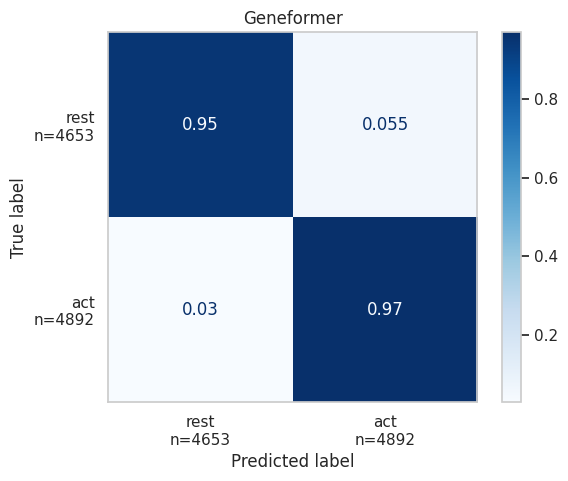

<Figure size 1000x1000 with 0 Axes>

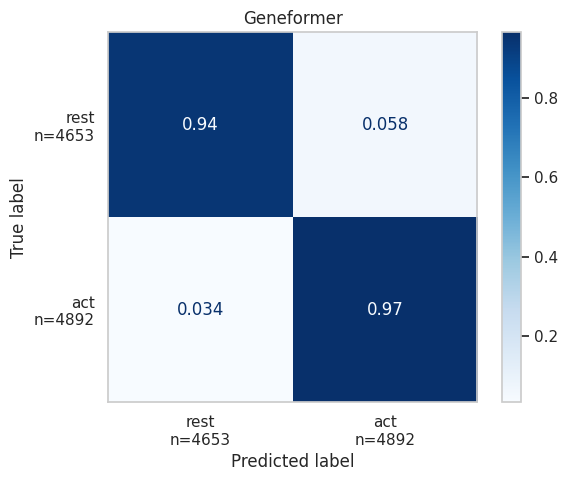

<Figure size 1000x1000 with 0 Axes>

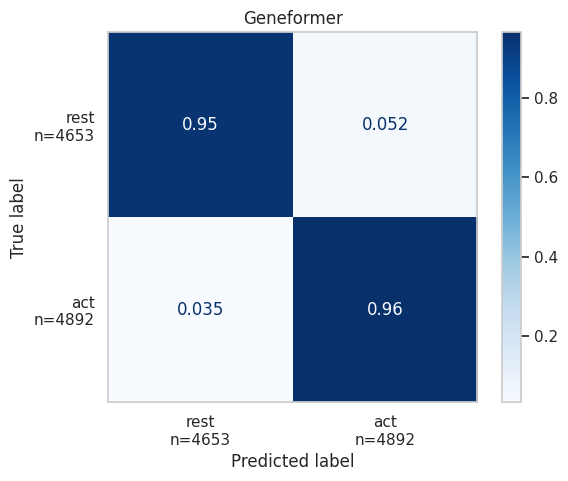

<Figure size 1000x1000 with 0 Axes>

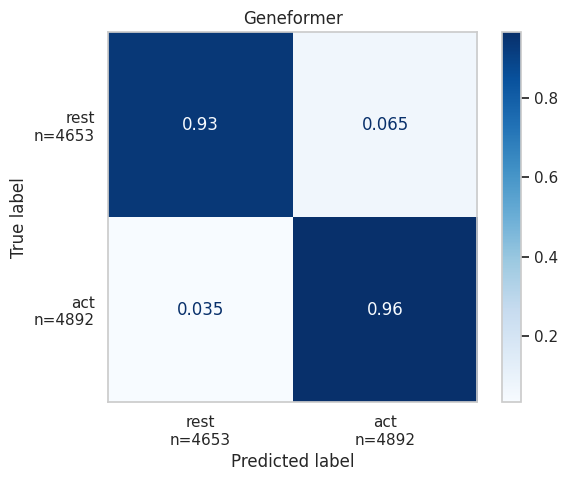

<Figure size 1000x1000 with 0 Axes>

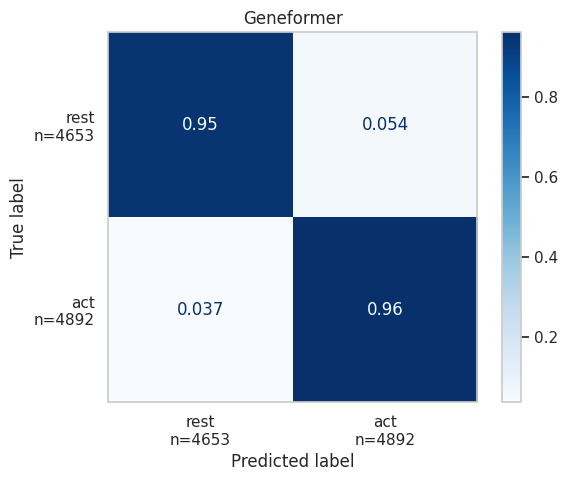

In [5]:
for fold in range(1,6):
    all_metrics =  all_folds_res[fold]
    cc.plot_conf_mat(conf_mat_dict={"Geneformer": all_metrics["conf_matrix"]},
                     output_directory=f"/u/home/r/ramadas/geneformer_models/k5folds",
                     output_prefix="cm_classifier_test")

In [6]:
# Before we use permuted data we have to convert it 
# 'label' field with numeric values that correspond to the class indices in the id_class_dic
# Normally when the classfier holds out part of the inputed dataset during the finetuning adds "label" column so need to duplicate that
from datasets import load_from_disk


permuted_dataset = load_from_disk("/u/scratch/r/ramadas/geneformer_tokenized_data/Q_data_permuted.dataset")

print("Dataset columns:", permuted_dataset.column_names)
print("Sample data:", permuted_dataset[:2])


with open("/u/scratch/r/ramadas/geneformer_output/250226191908/cm_classifier_test_id_class_dict.pkl", "rb") as f:
    id_class_dict = pickle.load(f)
print("ID-class dictionary:", id_class_dict)


def add_label(example):
    # Map stimulation values to numeric labels
    # Modify this mapping based on your id_class_dict
    stim_to_label = {"act": 0, "rest": 1}  # Adjust based on your actual mapping
    example["label"] = stim_to_label.get(example["stimulation"], -1)
    return example

modified_dataset = permuted_dataset.map(add_label)


modified_dataset.save_to_disk("/u/scratch/r/ramadas/geneformer_tokenized_data/Q_data_permuted_with_label.dataset")





Dataset columns: ['input_ids', 'stimulation', 'length']
Sample data: {'input_ids': [[2, 11305, 3104, 1711, 10275, 15809, 16620, 13991, 15719, 3244, 14275, 1505, 5746, 8838, 12039, 10408, 6128, 17745, 14003, 4988, 10319, 14141, 18059, 557, 14425, 10288, 134, 16990, 18476, 5549, 10336, 3043, 9296, 16989, 12552, 11457, 1793, 11700, 17322, 4387, 1861, 15239, 20173, 15612, 16423, 16130, 7854, 4471, 16393, 11701, 15054, 5237, 2979, 16744, 16108, 6926, 12176, 2274, 5672, 19046, 8726, 5034, 9578, 15279, 16969, 718, 4933, 5770, 16849, 4412, 10501, 2049, 13236, 15372, 12539, 9340, 15194, 6035, 2520, 6255, 2312, 12835, 18070, 12982, 10763, 10185, 4644, 11888, 8237, 7072, 438, 14775, 5925, 14434, 3849, 8090, 6898, 6593, 11898, 17308, 8640, 3925, 4982, 1773, 9986, 18386, 2505, 9549, 5603, 7518, 3563, 9433, 15556, 5701, 1604, 14732, 13357, 8322, 7260, 17474, 13249, 12837, 4568, 12042, 6963, 8557, 3533, 1377, 13635, 3525, 4023, 452, 8349, 9728, 9240, 2364, 270, 510, 2221, 11165, 1895, 10836, 4010, 40

Saving the dataset (0/1 shards):   0%|          | 0/47726 [00:00<?, ? examples/s]

In [7]:
# Evaluating Permutation Data with modified dataset
all_folds_res_permuted = {}
for fold in range(1,6):
    all_metrics_test = cc.evaluate_saved_model(
            model_directory=f"/u/scratch/r/ramadas/geneformer_output/250226191908/250226_geneformer_cellClassifier_cm_classifier_test/ksplit{fold}/",
            id_class_dict_file=f"/u/scratch/r/ramadas/geneformer_output/250226191908/cm_classifier_test_id_class_dict.pkl",
            test_data_file=f"/u/scratch/r/ramadas/geneformer_tokenized_data/Q_data_permuted_with_label.dataset",
            output_directory=f"/u/scratch/r/ramadas/geneformer_output/250226191908/permuted_res/",
            output_prefix="permuted_test",
        )
    all_folds_res_permuted[fold] = all_metrics_test
    print("Test Metrics Fold:", fold)
    print(all_metrics_test)

  0%|          | 0/239 [00:00<?, ?it/s]

Test Metrics Fold: 1
{'conf_matrix':        rest    act
rest  11733  12516
act   11307  12170, 'macro_f1': 0.5007962641991938, 'acc': 0.5008381175878975, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.00864676, 0.01929548, 0.02857342, 0.03940026,
       0.04970823, 0.05788644, 0.06764067, 0.07684116, 0.08642501,
       0.09745709, 0.10667178, 0.11675257, 0.12625122, 0.13536653,
       0.14520595, 0.15606764, 0.16697193, 0.17651318, 0.1872045 ,
       0.19844955, 0.20914086, 0.21915066, 0.23082166, 0.24134259,
       0.25160796, 0.26302338, 0.27546109, 0.28555608, 0.29565106,
       0.30595902, 0.31643736, 0.32593602, 0.33556247, 0.34476296,
       0.35340972, 0.36350471, 0.37445159, 0.38407803, 0.39562125,
       0.4051625 , 0.41372407, 0.42322273, 0.43293436, 0.44264599,
       0.45291136, 0.46360267, 0.47548665, 0.48558163, 0.49725263,
       0.50768838, 0.51752779, 0.52817651, 0.53733441, 0.54870725,
       0.55807812, 0.5665545 , 0.57515867, 0.58619074, 0.59479491,
       0.6

  0%|          | 0/239 [00:00<?, ?it/s]

Test Metrics Fold: 2
{'conf_matrix':        rest    act
rest  11666  12583
act   11293  12184, 'macro_f1': 0.49966867218960004, 'acc': 0.49972761178393327, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.00885974, 0.01801763, 0.02657921, 0.03624824,
       0.04702475, 0.05788644, 0.06666099, 0.07730971, 0.08685096,
       0.09681816, 0.10874473, 0.11859576, 0.12914768, 0.13801387,
       0.14823018, 0.1597308 , 0.17093325, 0.18141159, 0.19095285,
       0.20304076, 0.21343133, 0.22341015, 0.23222729, 0.24283341,
       0.25395068, 0.26387528, 0.27328875, 0.2836819 , 0.29347872,
       0.30323295, 0.31222047, 0.32308217, 0.33390127, 0.34497593,
       0.35532649, 0.36682711, 0.37470716, 0.38429101, 0.39502492,
       0.40362908, 0.41461856, 0.42415982, 0.43297696, 0.44358308,
       0.45308174, 0.46326192, 0.47318652, 0.48264259, 0.49290795,
       0.50466414, 0.51450356, 0.52621715, 0.53482131, 0.54385143,
       0.5540742 , 0.56548963, 0.57545683, 0.58593517, 0.59641351,
       0

  0%|          | 0/239 [00:00<?, ?it/s]

Test Metrics Fold: 3
{'conf_matrix':        rest    act
rest  11809  12440
act   11422  12055, 'macro_f1': 0.500007669104366, 'acc': 0.5000209529396974, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.01145802, 0.02155301, 0.0324147 , 0.04319121,
       0.0540529 , 0.06304042, 0.07449845, 0.08520073, 0.09397399,
       0.1039186 , 0.11392711, 0.12365875, 0.13442944, 0.14512721,
       0.15487498, 0.16484219, 0.17463901, 0.18464493, 0.19370517,
       0.20275163, 0.21394247, 0.22349534, 0.23265324, 0.24347233,
       0.25280061, 0.26391788, 0.27316097, 0.28355412, 0.2936491 ,
       0.30323295, 0.31371129, 0.32295438, 0.33172893, 0.34250543,
       0.35238744, 0.36205648, 0.37249223, 0.38297057, 0.39310815,
       0.40260681, 0.41334072, 0.42381906, 0.43318993, 0.4425608 ,
       0.4534225 , 0.46287856, 0.47352728, 0.48426119, 0.4950377 ,
       0.50624015, 0.51518507, 0.52681348, 0.53724922, 0.54593858,
       0.55650211, 0.56583039, 0.57575499, 0.58619074, 0.59539123,
       0.60

  0%|          | 0/239 [00:00<?, ?it/s]

Test Metrics Fold: 4
{'conf_matrix':        rest    act
rest  11667  12582
act   11291  12186, 'macro_f1': 0.4997313106304291, 'acc': 0.4997904706030256, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.00796524, 0.0174639 , 0.02683477, 0.03692976,
       0.04787665, 0.05971802, 0.07049453, 0.07948205, 0.08927887,
       0.09997018, 0.11100226, 0.12160838, 0.13281084, 0.14098905,
       0.15155258, 0.16258466, 0.1738723 , 0.18324317, 0.19338076,
       0.20313498, 0.21229288, 0.22179154, 0.23222729, 0.24198151,
       0.25271542, 0.26127699, 0.27392767, 0.28295779, 0.29318056,
       0.30327555, 0.31264642, 0.32312476, 0.33449759, 0.34369809,
       0.35498573, 0.3652511 , 0.37564425, 0.38446139, 0.39455637,
       0.4059718 , 0.41615198, 0.42505431, 0.43527708, 0.44605358,
       0.45631895, 0.46475274, 0.47356988, 0.48481493, 0.4950377 ,
       0.50364186, 0.5150147 , 0.52566342, 0.53597138, 0.54679048,
       0.55667249, 0.56583039, 0.57473272, 0.58687226, 0.5973506 ,
       0.6

  0%|          | 0/239 [00:00<?, ?it/s]

Test Metrics Fold: 5
{'conf_matrix':        rest    act
rest  11778  12471
act   11402  12075, 'macro_f1': 0.4997710987304011, 'acc': 0.4997904706030256, 'all_roc_metrics': {'mean_tpr': array([0.        , 0.01052094, 0.02065852, 0.03019977, 0.04148741,
       0.05094348, 0.06035695, 0.06938706, 0.0806747 , 0.08910849,
       0.10056651, 0.10963922, 0.11952123, 0.12910508, 0.13945564,
       0.14818759, 0.15802701, 0.16744047, 0.17813179, 0.18746007,
       0.19734208, 0.20603144, 0.21599864, 0.22809558, 0.23968139,
       0.2487115 , 0.26025472, 0.27196831, 0.28308557, 0.29381948,
       0.30455339, 0.31481876, 0.32738425, 0.33735145, 0.34680751,
       0.35553946, 0.36473996, 0.37589982, 0.38556885, 0.39553606,
       0.40503471, 0.41385186, 0.42232824, 0.43238063, 0.44230523,
       0.45154832, 0.4617285 , 0.47246241, 0.48187588, 0.4925246 ,
       0.5033437 , 0.51552583, 0.52545044, 0.53524726, 0.5457256 ,
       0.55450015, 0.5648507 , 0.57520126, 0.58393321, 0.59436896,
       0.6

<Figure size 1000x1000 with 0 Axes>

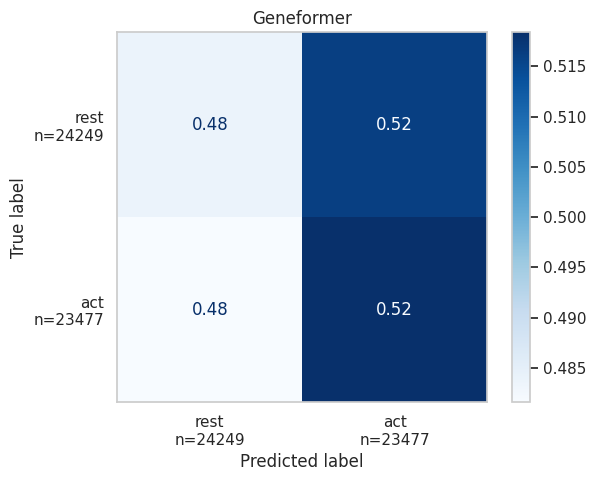

<Figure size 1000x1000 with 0 Axes>

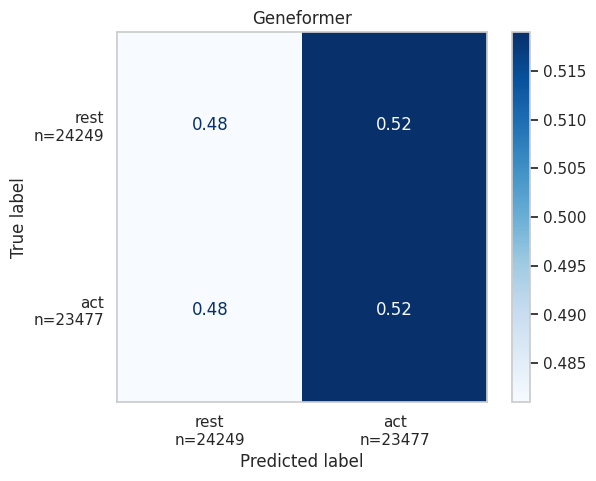

<Figure size 1000x1000 with 0 Axes>

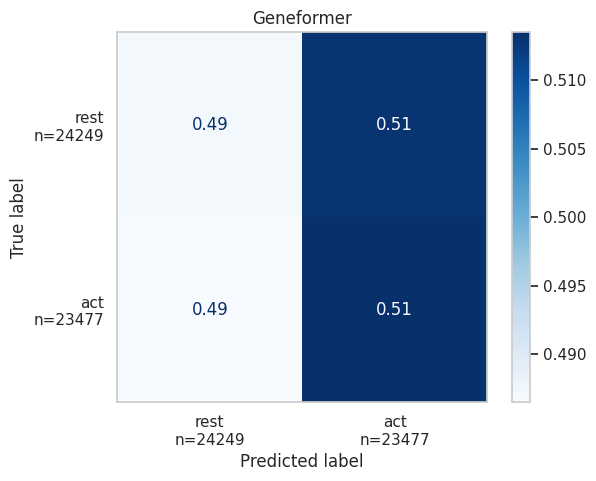

<Figure size 1000x1000 with 0 Axes>

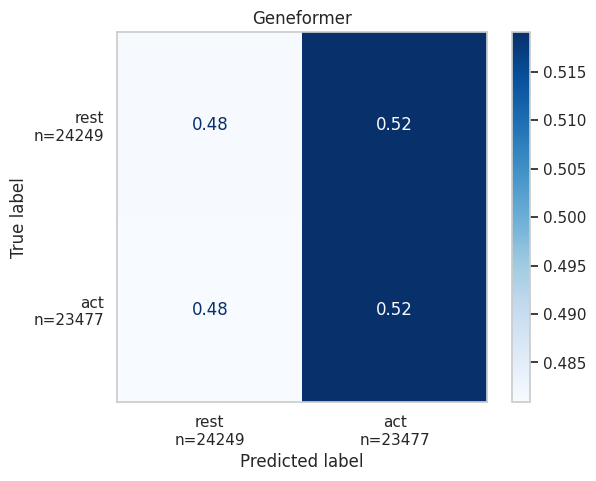

<Figure size 1000x1000 with 0 Axes>

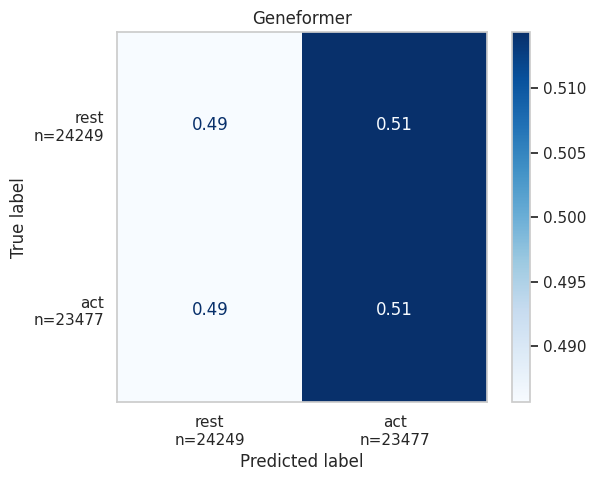

In [8]:
# Plotting Confusion Matrix with Permuted Data
for fold in range(1,6):
    all_metrics =  all_folds_res_permuted[fold]
    cc.plot_conf_mat(conf_mat_dict={"Geneformer": all_metrics["conf_matrix"]},
                     output_directory=f"/u/scratch/r/ramadas/geneformer_output/250226191908/permuted_res/",
                     output_prefix="cm_classifier_test")